# GATHERING

In [118]:
#import libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image


### Enhanced Twitter Archive

In [119]:
#working with the actual dataset

In [120]:
#import of the enhanced twitter dataset
twitter_enhanced_dataset=pd.read_csv(r'C:\Users\PNM\O-Folder\Data-Wrangle and Analysis\twitter-archive-enhanced.csv')

In [121]:
twitter_enhanced_dataset

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [122]:
#working with the actual dataset

### Image Predictions Dataset

In [123]:
#import image prediction dataset
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [124]:
#creation of a folder and check if it already existing
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [125]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [126]:
#confirming if the file is saved
os.listdir(folder_name)

['image-predictions.tsv']

In [127]:
#read the file 
image_prediction=pd.read_csv('image_prediction\image-predictions.tsv',sep='\t')

In [128]:
#view the image prediction dataset
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [129]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## In case we need additional data for the Twitter API

In [130]:
#we can use twitter developer data to run.
#consumer_key = 'My KEY'
#consumer_secret = 'My SECRET'
#access_token = 'My TOKEN'
#access_secret = 'My Access SECRET'
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth)

In [131]:
#gathering of the twitter api and we get only the tweet ID, retweet count and favourite count valaues only.

listing=[]
count=0
filing='tweet-json.txt'
with open(filing, encoding='utf-8') as file:
    for the_file in file:
        count +=1
        json_file=file.readline()
        mydata=(json.loads(the_file))
        tweet_id=mydata['id']
        retweet_count=mydata['retweet_count']
        favorite_count=mydata['favorite_count']
        listing.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
        
        twitter_api=pd.DataFrame(listing,columns=['tweet_id','retweet_count','favorite_count'])

# ACCESSING

#### Twitter Enhanced Archive

In [132]:
#we view only the first five rows
twitter_enhanced_dataset.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [133]:
#View 10 rows of the dataset
twitter_enhanced_dataset.sample(10)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1713,1713,680473011644985345,NaN,NaN,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,None,None,pupper,None
829,829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
1202,1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1986,1986,672884426393653248,NaN,NaN,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426...,6,10,None,None,None,None,None
1176,1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
388,388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None
2296,2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None
2298,2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2335,2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
244,244,846042936437604353,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,None,None,None,None


In [134]:
#Get more info about the datatype,count and total entries for the dataset
twitter_enhanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2356 non-null   int64  
 1   tweet_id                    2356 non-null   int64  
 2   in_reply_to_status_id       78 non-null     float64
 3   in_reply_to_user_id         78 non-null     float64
 4   timestamp                   2356 non-null   object 
 5   source                      2356 non-null   object 
 6   text                        2356 non-null   object 
 7   retweeted_status_id         181 non-null    float64
 8   retweeted_status_user_id    181 non-null    float64
 9   retweeted_status_timestamp  181 non-null    object 
 10  expanded_urls               2297 non-null   object 
 11  rating_numerator            2356 non-null   int64  
 12  rating_denominator          2356 non-null   int64  
 13  name                        2356 

In [135]:
#This help us understand the datset better by viewing the mean,standard deviation, maximumm etc 
twitter_enhanced_dataset.describe()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.000000,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,1177.500000,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,680.262939,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,588.750000,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,1177.500000,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,1766.250000,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,2355.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [136]:
#check for any duplicated data in the tweet ID column
twitter_enhanced_dataset.tweet_id.nunique()

2356

In [137]:
#Check for empty values in the retweet status column
twitter_enhanced_dataset.retweeted_status_user_id.isna().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

In [138]:
# Get the sum of each columns having empty or null values
twitter_enhanced_dataset.isna().sum()

Unnamed: 0                       0
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [139]:
# we view the twitter rating numerators to check if there are problems
twitter_enhanced_dataset.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### Quality Issue 5
* There are some rating for numerators that are above 10 which is not right

In [140]:
# we view the twitter rating denominators to check if there are problems
twitter_enhanced_dataset.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [141]:
#we view regualar expression that may be having conflicing values on the numerators or denominators
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset[twitter_enhanced_dataset['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\pnm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [142]:
#we attempt to view the unique values of the dog age grouping
group=twitter_enhanced_dataset[['tweet_id','doggo','floofer','pupper','puppo']]
group

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


In [143]:
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset[['tweet_id', 'source']])

,tweet_id,source
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...,...
2351,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2352,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2353,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2354,666029285002620928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


## Image Prediction

In [144]:
#we view the image prediction value for the top 5 entries
image_prediction.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
378,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1968,868552278524837888,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,whippet,0.378151,True,Italian_greyhound,0.275935,True,American_Staffordshire_terrier,0.094991,True


In [145]:
#we get the information of the dataset about the datatype,count and the total entries for tthe dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'img_num'}>],
       [<AxesSubplot:title={'center':'p1_conf'}>,
        <AxesSubplot:title={'center':'p2_conf'}>],
       [<AxesSubplot:title={'center':'p3_conf'}>, <AxesSubplot:>]],
      dtype=object)

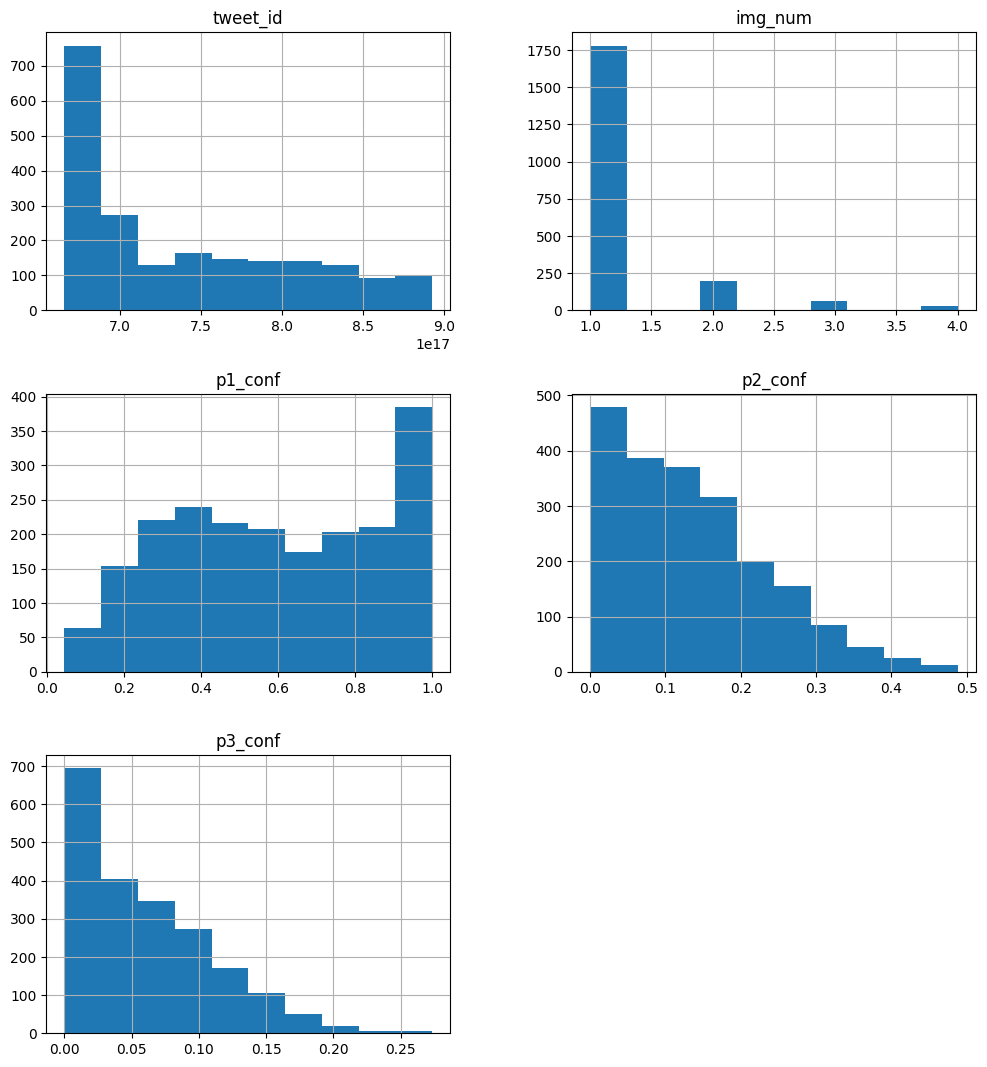

In [146]:
#we try to understand the dataset better by viewing the histogram for each coolumn 
image_prediction.hist(figsize=(12,13))

In [147]:
#to check is there is null value in each column
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [148]:
#to check if there is duplicated images in the column
image_prediction.jpg_url.duplicated(keep=False).value_counts()

False    1943
True      132
Name: jpg_url, dtype: int64

In [149]:
#To check for the count of each value in the image number column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [150]:
#check if there exist duplicates in the tweet id column
image_prediction.tweet_id.duplicated(keep=False).value_counts()


False    2075
Name: tweet_id, dtype: int64

In [151]:
##check if there exist duplicates in the p1 dog column

image_prediction.p1_dog.duplicated(keep=False).sum()

2075

In [152]:
##check if there exist duplicates in the p2 dog column

image_prediction.p2_dog.duplicated(keep=False).value_counts()

True    2075
Name: p2_dog, dtype: int64

In [153]:
##check if there exist duplicates in the p3 dog column

image_prediction.p3_dog.duplicated(keep=False).value_counts()


True    2075
Name: p3_dog, dtype: int64

In [154]:
#check for values in p1_dog,p2_dog and p3_dog that are false or otherwise
image_prediction[["p1_dog","p2_dog","p3_dog"]].apply(lambda x:
    (x[0] == False and x[1] == False and x[2] == False) 
    , axis = 1).value_counts()

False    1751
True      324
dtype: int64

## Twitter API

In [155]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226


In [156]:
twitter_api.sample(8)

,tweet_id,retweet_count,favorite_count
757,690959652130045952,1421,3902
955,674394782723014656,635,1607
867,679722016581222400,539,1817
338,789280767834746880,5747,0
1071,669942763794931712,183,536
608,714957620017307648,1595,4503
84,859196978902773760,25661,75193
0,892420643555336193,8853,39467


In [157]:
# view the information of the dataset
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [158]:
#check if there is any null values in the dataset
twitter_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [159]:
#check for duplicates on the tweet id column
twitter_api.tweet_id.duplicated().sum()

0

In [160]:
#to check the shape of the dataset
twitter_api.shape

(1177, 3)

### Quality Issue

* twitter_enhanced_dataset- Null values for column 2,3,7,8,9
* twitter_enhanced_dataset- incomplete data for index 1,2,6,7,8,9
* twitter_enhanced_dataset- retweet status id have duplictes
* twitter_enhanced_dataset- there are empty values in 6 columns
* twitter_enhanced_dataset- incorrect datatype for index 8
* twitter_enhanced_dataset-- All the tweet id are unique so no duplicate* the above contain records of rating of numerators that were not correctly recorded
* twitter_enhanced_dataset- split of the retweeted_status_timestamp column
* twitter_enhanced_dataset- replacing the datatype of  the retweeted_status_timestamp
* image prediction- the names of (p1,p2,p3) are having underscore hence it may  not be easy to understand
* image prediction- Some of the images have duplicates
* image-prediction- The img_num column wasn't important

### Tidyness Issues for twitter_archive_enhanced

* twitter_enhanced_dataset- The dog age group could have been merged to reduce the number of column
* twitter_enhanced_dataset- The source column need only the source of information not the whole link
* image_prediction- uncatogorising of the p1,p2,p3 values 
* image_prediction- p1_conf,p2_conf,p3_conf should have been grouped

# CLEANING

## twitter_enhanced_dataset

In [215]:
#making a copy of all three dataset this dataset for reference purpose
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset.copy()
image_prediction_cleaning=image_prediction.copy()
twitter_api_cleaning=twitter_api.copy()

In [216]:
# cleaning timestamp dataset
twitter_enhanced_dataset_cleaning['timestamp'] = twitter_enhanced_dataset_cleaning['timestamp'].str.slice(start=0, stop=-6)

In [217]:
twitter_enhanced_dataset_cleaning['timestamp'] = pd.to_datetime(twitter_enhanced_dataset_cleaning['timestamp'], format= "%Y-%m-%d %H:%M:%S")

In [218]:
twitter_enhanced_dataset_cleaning['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [220]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  2356 non-null   int64         
 1   tweet_id                    2356 non-null   int64         
 2   in_reply_to_status_id       78 non-null     float64       
 3   in_reply_to_user_id         78 non-null     float64       
 4   timestamp                   2356 non-null   datetime64[ns]
 5   source                      2356 non-null   object        
 6   text                        2356 non-null   object        
 7   retweeted_status_id         181 non-null    float64       
 8   retweeted_status_user_id    181 non-null    float64       
 9   retweeted_status_timestamp  181 non-null    object        
 10  expanded_urls               2297 non-null   object        
 11  rating_numerator            2356 non-null   int64       

In [222]:
# cleaning dataset
# Get all the three columns and replace all underscores with space
image_prediction_cleaning['p1'] = image_prediction_cleaning['p1'].str.replace('_', ' ')
image_prediction_cleaning['p2'] = image_prediction_cleaning['p2'].str.replace('_', ' ')
image_prediction_cleaning['p3'] = image_prediction_cleaning['p3'].str.replace('_', ' ')

In [225]:
# Confirm changes
image_prediction_cleaning[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


In [226]:
# Get all the three columns and convert their values to title case
image_prediction_cleaning['p1'] = image_prediction_cleaning['p1'].str.title()
image_prediction_cleaning['p2'] = image_prediction_cleaning['p2'].str.title()
image_prediction_cleaning['p3'] = image_prediction_cleaning['p3'].str.title()

In [227]:
# Check for confirmation
image_prediction_cleaning[['p1','p2','p3']].sample(5)

,p1,p2,p3
196,Eskimo Dog,Siberian Husky,White Wolf
1024,Pembroke,Cardigan,Malamute
661,Whippet,Italian Greyhound,Mexican Hairless
153,Beagle,Italian Greyhound,Basenji
146,French Bulldog,Pug,Boston Bull


## Define
* Drop all columns that are not important for this analysis

## Code

In [162]:
#we drop all unnecessary columns to reduce the size
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset_cleaning.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)

## Test

In [163]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2356 non-null   int64 
 1   tweet_id            2356 non-null   int64 
 2   timestamp           2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(4), object(7)
memory usage: 202.6+ KB


## Define
* Change the values of the numerator rating column that are not correct 

## Code

In [164]:
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset_cleaning[twitter_enhanced_dataset_cleaning['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\pnm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [165]:
#we manually change the numerators that are wrongly gathered based on the values on the text
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==883482846933004288,'rating_numerator']=13.5
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==681340665377193984,'rating_numerator']=9.5
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==680494726643068929,'rating_numerator']=11.26
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==786709082849828864,'rating_numerator']=9.75
twitter_enhanced_dataset_cleaning.loc[twitter_enhanced_dataset_cleaning.tweet_id==778027034220126208,'rating_numerator']=11.27

## Test

In [166]:
with pd.option_context('max_colwidth', 200):
    display(twitter_enhanced_dataset_cleaning[twitter_enhanced_dataset_cleaning['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

c:\users\pnm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.00,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


## Define 
* we create a rating column which is the division of the nemerator and denomiator


## Code

In [167]:
twitter_enhanced_dataset_cleaning['rating']=twitter_enhanced_dataset_cleaning.rating_numerator/twitter_enhanced_dataset_cleaning.rating_denominator


## Test

In [168]:
twitter_enhanced_dataset_cleaning.sample(7)

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1194,1194,717428917016076293,2016-04-05 19:09:17 +0000,This is Skittle. He's trying to communicate. 1...,11.0,10,Skittle,None,None,None,None,1.1
1035,1035,744995568523612160,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,9.0,10,Abby,None,None,None,puppo,0.9
2293,2293,667152164079423490,2015-11-19 01:27:25 +0000,This is Pipsy. He is a fluffball. Enjoys trave...,12.0,10,Pipsy,None,None,None,None,1.2
1854,1854,675534494439489536,2015-12-12 04:35:48 +0000,Seriously guys?! Only send in dogs. I only rat...,11.0,10,a,None,None,None,None,1.1
168,168,859607811541651456,2017-05-03 03:17:27 +0000,Sorry for the lack of posts today. I came home...,13.0,10,None,None,None,None,puppo,1.3
1352,1352,703774238772166656,2016-02-28 02:50:28 +0000,"""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",10.0,10,None,None,None,None,None,1.0
1300,1300,707693576495472641,2016-03-09 22:24:31 +0000,This is Jiminus. He's in a tub for some reason...,7.0,10,Jiminus,None,None,None,None,0.7


## Define 

* Create a column which contains the differnt age group of the dogs


## Code

In [169]:
# remove unwanted timestamp
twitter_enhanced_dataset_cleaning=pd.melt(twitter_enhanced_dataset_cleaning,id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','rating'],value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_group')

In [170]:
# show some of the filtered timestamp dataset
twitter_enhanced_dataset_cleaning.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,variable,dog_group
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,1.3,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,1.3,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,1.2,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,1.3,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,1.2,doggo,None


## Define 

* we  drop the variable column 

## Code

In [171]:
twitter_enhanced_dataset_cleaning.drop('variable', inplace=True,axis=1)

## Test

In [172]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            9424 non-null   int64  
 1   timestamp           9424 non-null   object 
 2   text                9424 non-null   object 
 3   rating_numerator    9424 non-null   float64
 4   rating_denominator  9424 non-null   int64  
 5   name                9424 non-null   object 
 6   rating              9424 non-null   float64
 7   dog_group           9424 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 589.1+ KB


## Define
* Drop all duplicates that exist because of the dog_group column created


## Code

In [173]:
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset_cleaning.sort_values('dog_group')

In [174]:
twitter_enhanced_dataset_cleaning=twitter_enhanced_dataset_cleaning.drop_duplicates(subset='tweet_id', keep='last')

## Test 

In [175]:
twitter_enhanced_dataset_cleaning.dog_group.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_group, dtype: int64

In [176]:
twitter_enhanced_dataset_cleaning.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,dog_group
2259,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,1.2,None
2260,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10,None,0.5,None
2261,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,1.0,10,None,0.1,None
2262,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,9.0,10,George,0.9,None
2263,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",10.0,10,Kial,1.0,None


In [177]:
twitter_enhanced_dataset_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   float64
 4   rating_denominator  2356 non-null   int64  
 5   name                2356 non-null   object 
 6   rating              2356 non-null   float64
 7   dog_group           2356 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 165.7+ KB


#### Image Prediction

In [178]:
#we view randomly the image prediction dataset
image_prediction_cleaning.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
799,691321916024623104,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1,Rottweiler,0.508981,True,German_shepherd,0.207897,True,kelpie,0.094353,True
316,671743150407421952,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
2000,876120275196170240,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,Bernese_mountain_dog,0.534327,True,Saint_Bernard,0.346312,True,Greater_Swiss_Mountain_dog,0.094933,True
37,666454714377183233,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,dalmatian,0.278954,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1031,711363825979756544,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,1,Pembroke,0.750906,True,Cardigan,0.241152,True,basenji,0.002640,True
643,681523177663676416,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True


## Define 
* Create dog_breed that checks for the best predicted value is p1 then prints it else it checks for it and print it


## Code

In [179]:
def predicted_image(image_prediction_cleaning):
    if image_prediction_cleaning.p1_dog==True:
        return image_prediction_cleaning.p1
    elif image_prediction_cleaning.p2_dog==True:
        return image_prediction_cleaning.p2
    elif image_prediction_cleaning.p3_dog==True:
        return image_prediction_cleaning.p3
    else:
        return 'Error'

# Test

In [180]:
image_prediction_cleaning['dog_breed']=image_prediction_cleaning.apply(predicted_image,axis=1)

## Define 
* Create dog_breed that checks for the best predicted confidence level is p1 then prints it's value else it checks for others

## Code

In [181]:
def predicted_confidence(image_prediction_cleaning):
    if image_prediction_cleaning['p1_dog']==True:
        return image_prediction_cleaning.p1_conf
    elif image_prediction_cleaning.p2_dog==True:
        return image_prediction_cleaning.p2_conf
    elif image_prediction_cleaning.p3_dog==True:
        return image_prediction_cleaning.p3_conf
    else:
        return 'error'

## Test

In [182]:
image_prediction_cleaning['Confidence_level']=image_prediction_cleaning.apply(predicted_confidence,axis=1)

In [183]:
image_prediction_cleaning.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,Confidence_level
1295,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True,Lakeland_terrier,0.424168
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True,Cardigan,0.771008
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True,kuvasz,0.038243
190,669393256313184256,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,1,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True,cocker_spaniel,0.359843
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False,Pomeranian,0.6485
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True,toy_poodle,0.01804
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False,Error,error
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True,French_bulldog,0.992833
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,Pembroke,0.438087
2005,877556246731214848,https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg,1,basset,0.995368,True,Welsh_springer_spaniel,0.001936,True,bathtub,0.000468,False,basset,0.995368


## Define 
* We  remove error values in the dog_breed column


## Code

In [184]:
image_prediction_cleaning=image_prediction_cleaning.loc[image_prediction_cleaning['dog_breed']!= 'Error']

## Test 

In [185]:
image_prediction_cleaning.dog_breed.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

In [186]:
image_prediction_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_breed         1751 non-null   object 
 13  Confidence_level  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [187]:
# we check for the list of the dataset so as to nable us drop unecessary columns
list(image_prediction_cleaning)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_breed',
 'Confidence_level']

In [188]:
best_prediction = image_prediction_cleaning.groupby(['p1_dog'])['p1_dog'].count()

## Define 
* Drop all columns that we will not be using

## Code

In [189]:
# we drop all columns that are not used
image_prediction_cleaning=image_prediction_cleaning.drop(columns={'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'},axis=1)

## Test

In [190]:
image_prediction_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   int64 
 1   jpg_url           1751 non-null   object
 2   img_num           1751 non-null   int64 
 3   dog_breed         1751 non-null   object
 4   Confidence_level  1751 non-null   object
dtypes: int64(2), object(3)
memory usage: 82.1+ KB


## Twitter API

In [191]:
twitter_api_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [192]:
twitter_api_cleaning.describe()

,tweet_id,retweet_count,favorite_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.427463e+17,3222.255735,8260.755310
std,6.856773e+16,5106.835873,12088.982006
min,6.660293e+17,0.000000,0.000000
25%,6.783997e+17,634.000000,1499.000000
50%,7.195514e+17,1483.000000,3705.000000
75%,7.993088e+17,3737.000000,10202.000000
max,8.924206e+17,52360.000000,132810.000000


## STORING

## Define
* We create a new dataframe that is used to merge the three dataset


## Code

In [193]:
df=pd.merge(twitter_enhanced_dataset_cleaning,image_prediction_cleaning, on='tweet_id',how='inner').merge( twitter_api, on='tweet_id',how='inner')                 



## Test

In [194]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating,dog_group,jpg_url,img_num,dog_breed,Confidence_level,retweet_count,favorite_count
0,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,9.0,10,George,0.9,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,138,355
1,667538891197542400,2015-11-20 03:04:08 +0000,This is a southwest Coriander named Klint. Hat...,9.0,10,a,0.9,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,Yorkshire_terrier,0.618957,72,220
2,667517642048163840,2015-11-20 01:39:42 +0000,This is Dook &amp; Milo. Dook is struggling to...,8.0,10,Dook,0.8,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,203,389
3,667502640335572993,2015-11-20 00:40:05 +0000,Say hello to Hall and Oates. Oates is winking ...,11.0,10,Hall,1.1,None,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,231,563
4,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10,None,0.7,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,242,559


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            869 non-null    int64  
 1   timestamp           869 non-null    object 
 2   text                869 non-null    object 
 3   rating_numerator    869 non-null    float64
 4   rating_denominator  869 non-null    int64  
 5   name                869 non-null    object 
 6   rating              869 non-null    float64
 7   dog_group           869 non-null    object 
 8   jpg_url             869 non-null    object 
 9   img_num             869 non-null    int64  
 10  dog_breed           869 non-null    object 
 11  Confidence_level    869 non-null    object 
 12  retweet_count       869 non-null    int64  
 13  favorite_count      869 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 101.8+ KB


## Define
* We drop duplicates of the tweet_id



## Code

In [196]:
df=df.drop_duplicates('tweet_id')

## Test

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            869 non-null    int64  
 1   timestamp           869 non-null    object 
 2   text                869 non-null    object 
 3   rating_numerator    869 non-null    float64
 4   rating_denominator  869 non-null    int64  
 5   name                869 non-null    object 
 6   rating              869 non-null    float64
 7   dog_group           869 non-null    object 
 8   jpg_url             869 non-null    object 
 9   img_num             869 non-null    int64  
 10  dog_breed           869 non-null    object 
 11  Confidence_level    869 non-null    object 
 12  retweet_count       869 non-null    int64  
 13  favorite_count      869 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 101.8+ KB


In [198]:
#we check if the text has duplicates
df.text.duplicated().value_counts()

False    869
Name: text, dtype: int64

## Define
* Store the new datset into a new file termed twitter_archive_master_csv


## Code

In [199]:
df.to_csv('twitter_archive_master',index=False,header=False,encoding='utf-8')

## Test

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            869 non-null    int64  
 1   timestamp           869 non-null    object 
 2   text                869 non-null    object 
 3   rating_numerator    869 non-null    float64
 4   rating_denominator  869 non-null    int64  
 5   name                869 non-null    object 
 6   rating              869 non-null    float64
 7   dog_group           869 non-null    object 
 8   jpg_url             869 non-null    object 
 9   img_num             869 non-null    int64  
 10  dog_breed           869 non-null    object 
 11  Confidence_level    869 non-null    object 
 12  retweet_count       869 non-null    int64  
 13  favorite_count      869 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 101.8+ KB


In [201]:
df.retweet_count.isna().sum()

0

### Analysis and Visualization

#### Insights:

    Which are the most common dog stage?

    What is the correlation between retweet and favourite counts?

In [202]:
#We check for the counts of each dog age group
df.dog_group.value_counts()

None       736
pupper      86
doggo       29
puppo       15
floofer      3
Name: dog_group, dtype: int64

In [203]:
df2=df.query("dog_breed=='golden_retriever'")
df2.jpg_url.sample(4)

218    https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg
492    https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg
441    https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg
233    https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg
Name: jpg_url, dtype: object

In [204]:
Image(url='https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg')

In [205]:
Image(url='https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg')

In [206]:
Image(url='https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg')

In [207]:
df3=df.query("dog_breed=='Scotch_terrier'")
df3.jpg_url.sample(1)

169    https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg
Name: jpg_url, dtype: object

In [208]:
Image(url='https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg')

In [209]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Histogram showing top ten(10) dog breed per rating')

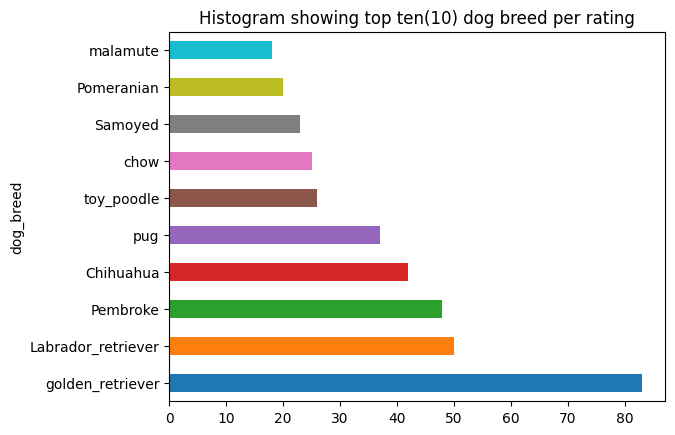

In [210]:
#we plot a bar chart to show the top 10 dog breeds based on their rating
import plotly.express as px
colour=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_bar=df.groupby(['dog_breed'])['rating'].size().to_frame().sort_values(['rating'],ascending=False).head(10).reset_index().plot.barh(x='dog_breed',y='rating',color=colour,legend=False)
plt.xlabel=('rating for dog breeds')
plt.ylabel=('dog breed')
plt.title('Histogram showing top ten(10) dog breed per rating')

Text(0.5, 1.0, 'Histogram showing bottom ten(10) dog breed per rating')

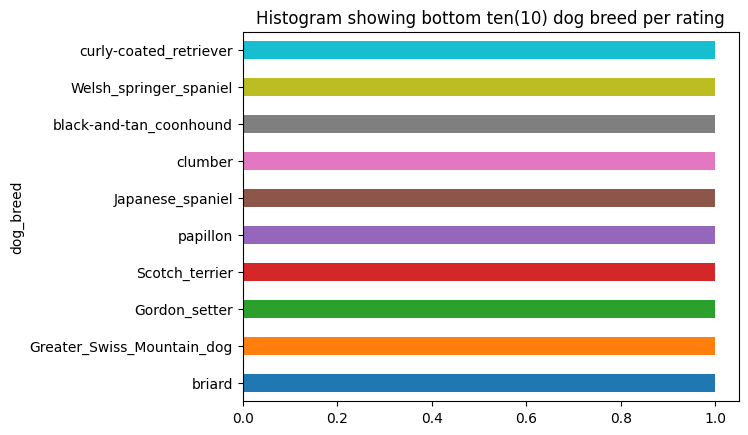

In [211]:
#we plot a bar chart to show the top 10 dog breeds based on their rating
import plotly.express as px
colour=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_bar=df.groupby(['dog_breed'])['rating'].size().to_frame().sort_values(['rating'],ascending=False).tail(10).reset_index().plot.barh(x='dog_breed',y='rating',color=colour,legend=False)
plt.xlabel=('rating for dog breeds')
plt.ylabel=('dog breed')
plt.title('Histogram showing bottom ten(10) dog breed per rating')

Text(0.5, 1.0, 'Bar chart showing top ten(10) dog breed per favorite count')

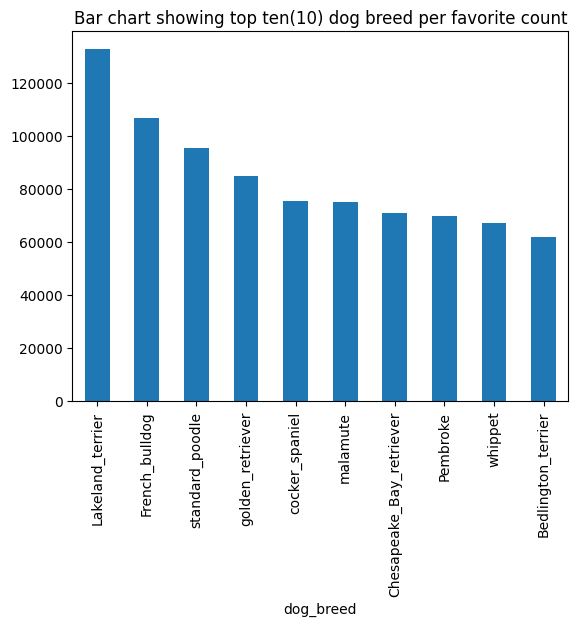

In [212]:
df.groupby(['dog_breed','favorite_count']).size().to_frame().sort_values(['favorite_count'],ascending=False).head(10).reset_index().plot.bar(y='favorite_count',x='dog_breed',legend=False)
plt.ylabel=('favorite count for dog breeds')
plt.xlabel=('dog breed')
plt.title('Bar chart showing top ten(10) dog breed per favorite count')

Text(0.5, 1.0, 'Bar chart showing top ten(10) dog breed per retweet count')

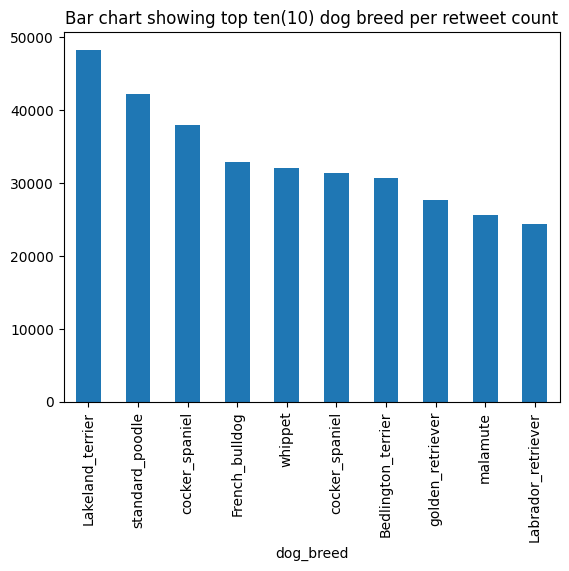

In [213]:
df.groupby(['dog_breed','retweet_count']).size().to_frame().sort_values(['retweet_count'],ascending=False).head(10).reset_index().plot.bar(y='retweet_count',x='dog_breed',legend=False)
plt.ylabel=('retweet count for dog breeds')
plt.xlabel=('dog breed')
plt.title('Bar chart showing top ten(10) dog breed per retweet count')

In [214]:
#we describe the data based on the dog group which will show the mean,median,standard deviation etc for each column
df.groupby('dog_breed').describe().sort_values(['dog_breed'],ascending=False).head(20).reset_index()

dog_breed tweet_id                              \
                                   count          mean           std   
0       wire-haired_fox_terrier      2.0  7.712716e+17  3.104838e+16   
1                       whippet      3.0  6.938456e+17  1.608853e+16   
2                        vizsla      4.0  7.275213e+17  6.123681e+16   
3                   toy_terrier      2.0  7.417469e+17  1.008616e+17   
4                    toy_poodle     26.0  7.242713e+17  5.223905e+16   
5               standard_poodle      9.0  7.404337e+17  6.493811e+16   
6   soft-coated_wheaten_terrier      8.0  6.886576e+17  2.181973e+16   
7                 silky_terrier      1.0  7.737047e+17           NaN   
8                    schipperke      7.0  7.759135e+17  5.701362e+16   
9                       redbone      3.0  7.003046e+17  5.697088e+16   
10                          pug     37.0  7.174782e+17  5.491412e+16   
11                     papillon      1.0  6.673934e+17           NaN   
12          miniature_schnauzer      3.0  6.734165e+17  9.900228e+15   
13             miniature_poodle      2.0  6.731023e+17  9.961275e+15   
14           miniature_pinscher     10.0  7.317419e+17  7.345968e+16   
15                     malinois      4.0  7.174407e+17  6.217775e+16   
16                     malamute     18.0  7.647203e+17  6.945932e+16   
17                       kuvasz     16.0  7.361761e+17  6.447366e+16   
18                     komondor      2.0  7.303434e+17  8.726645e+16   
19                       kelpie      9.0  7.589597e+17  7.791170e+16   

                                                                          \
             min           25%           50%           75%           max   
0   7.493170e+17  7.602943e+17  7.712716e+17  7.822488e+17  7.932261e+17   
1   6.762197e+17  6.868976e+17  6.975755e+17  7.026585e+17  7.077415e+17   
2   6.699428e+17  6.874095e+17  7.155289e+17  7.556407e+17  8.090848e+17   
3   6.704270e+17  7.060870e+17  7.417469e+17  7.774069e+17  8.130668e+17   
4   6.675467e+17  6.770634e+17  7.049613e+17  7.624522e+17  8.369900e+17   
5   6.684842e+17  6.751668e+17  7.435456e+17  7.612929e+17  8.512249e+17   
6   6.671762e+17  6.723351e+17  6.834040e+17  6.994904e+17  7.268871e+17   
7   7.737047e+17  7.737047e+17  7.737047e+17  7.737047e+17  7.737047e+17   
8   6.790626e+17  7.472326e+17  7.895309e+17  8.094617e+17  8.494123e+17   
9   6.660293e+17  6.674222e+17  6.688152e+17  7.174422e+17  7.660692e+17   
10  6.660829e+17  6.764964e+17  6.983557e+17  7.490644e+17  8.862584e+17   
11  6.673934e+17  6.673934e+17  6.673934e+17  6.673934e+17  6.673934e+17   
12  6.668178e+17  6.677246e+17  6.686314e+17  6.767158e+17  6.848002e+17   
13  6.660586e+17  6.695804e+17  6.731023e+17  6.766241e+17  6.801460e+17   
14  6.667769e+17  6.705063e+17  6.935992e+17  7.876864e+17  8.537609e+17   
15  6.708325e+17  6.751632e+17  6.967049e+17  7.389824e+17  8.055206e+17   
16  6.704529e+17  7.144406e+17  7.535454e+17  8.129216e+17  8.851676e+17   
17  6.717299e+17  6.906403e+17  7.076337e+17  7.592600e+17  8.867369e+17   
18  6.686367e+17  6.994900e+17  7.303434e+17  7.611967e+17  7.920501e+17   
19  6.688925e+17  6.841888e+17  7.479636e+17  8.385615e+17  8.710326e+17   

   rating_numerator  ... retweet_count          favorite_count                \
              count  ...           75%      max          count          mean   
0               2.0  ...       3130.75   3338.0            2.0   8538.500000   
1               3.0  ...      16342.50  31989.0            3.0  24022.666667   
2               4.0  ...       2516.00   4046.0            4.0   6027.750000   
3               2.0  ...       1751.75   2276.0            2.0   4708.000000   
4              26.0  ...       2423.25  21324.0           26.0   6264.692308   
5               9.0  ...       1795.00  42228.0            9.0  15423.777778   
6               8.0  ...       1059.75   1799.0            8.0   2126.500000   
7               1.0  ...       1891.00   189